# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)


<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [1]:
from lib import *
import numpy as np
from vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *

# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint



<a id='section_id'></a>

# Utilities


<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [2]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [3]:
a=makeAset(n=100)
b=makeBset(n=100)
c=makeCset(n=100)
d=makeDset(n=100)

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [4]:
def jarvis_vis(points):
    
    plot = Plot(scenes=[Scene(points=[PointsCollection(points, marker='.')])])
    lines = []
    count = 0

    # Tolerancja dla 0
    EPS = 1e-8

    # znajdujemy indeks punktu o najmniejszej rzędnej (jeżeli jest wiele - 
    # to bierzemy ten z nich o najmniejszej odciętej)
    istart = 0
    convex_hull = []
    
    # rozmiar tablicy dzielimy przez 2, ponieważ każdy punkt jest liczony za 2 w np.array
    for i in range(len(points)):
        if points[i][1] < points[istart][1]:
            istart = i
        elif points[i][1] == points[istart][1] and points[i][0] < points[istart][0]:
            istart = i
     
    # zbieramy indeksy punktów na otoczce
    convex_hull.append(istart)

    irand = 0 if istart != 0 else 1
    
    vec = (points[irand][0] - points[istart][0],points[irand][1] - points[istart][1])
    prev = istart
    while True:
#         print('jarvis: petla while')
        imax = irand
        
        plot.add_scene(Scene(points=[PointsCollection(points, marker='.'), 
                                    PointsCollection(points[convex_hull], color='r')],
                            lines=[LinesCollection(lines[:count], color='r')]))
        count += 1
            
            
        for i in range(points.size // 2):
            if i != prev and i != imax:
                orient = orientation(points[prev], points[imax], points[i], EPS)
                # jeżeli punkt jest po prawej stronie rozważanego wektora,
                #to jest nowym kandydatem na punkt otoczki
                if orient == -1:
                    imax = i
                    
                # jeżeli jest zerem (z dokładnością do tolerancji)
                # to sprawdzamy odległośc i bierzemy ten dalszy
                elif orient == 0 and (dist(points[prev], points[imax]) < dist(points[prev], points[i])):
                    imax = i
                    
                plot.add_scene(Scene(points=[PointsCollection(points, marker='.'), 
                                            PointsCollection(points[convex_hull], color='r'),
                                            PointsCollection([points[i]], color='indigo'),
                                            PointsCollection([points[imax]], color='green')],
                                    lines=[LinesCollection(lines[:count], color='r'),
                                            LinesCollection([[points[prev], points[i]]], color='indigo', linestyle='--'),
                                            LinesCollection([[points[prev], points[imax]]], color='green', linestyle='--')]))

                        
        # dlaczego to od razu dodaje całą otoczkę? xDD
        lines.append([points[prev], points[imax]])
                        
                
        # po wykonaniu tej pęli w imax znajduje sie indeks punktu "do którego kąt skierowany jest najmniejszy"
        # ==> należy on do otoczki (chyba, że inny punkt jest wspóliniowy? to co wtedy??)
        # W TYM MIEJSCU NALEŻY DODAĆ KRAWĘDŹ DO WIZUALIZACJI! (zapamiętać ją)
        # jeżeli dojedziemy do punktu początkowego to kończymy
        if imax == istart:
            break;


        convex_hull.append(imax)
        vec = points[imax] - points[prev]
        prev = imax
    
    
    plot.scenes.insert(0, Scene(points=[PointsCollection(points, marker='.'),
                                        PointsCollection(points[convex_hull], color='r')],
                                lines=[LinesCollection(lines[:count], color='r')]))
    plot.add_scene(Scene(points=[PointsCollection(points, marker='.'), 
                                PointsCollection(points[convex_hull], color='r')],
                        lines=[LinesCollection(lines[:count], color='r')]))
    return points[convex_hull], plot

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 12
Punkty otoczki:
array([[ -95,  -98],
       [  64,  -83],
       [  73,  -79],
       [  96,   -7],
       [  98,   29],
       [ 100,   76],
       [  80,   84],
       [  18,   91],
       [ -55,   93],
       [ -74,   92],
       [ -99,   79],
       [-100,  -60]])


<IPython.core.display.Javascript object>


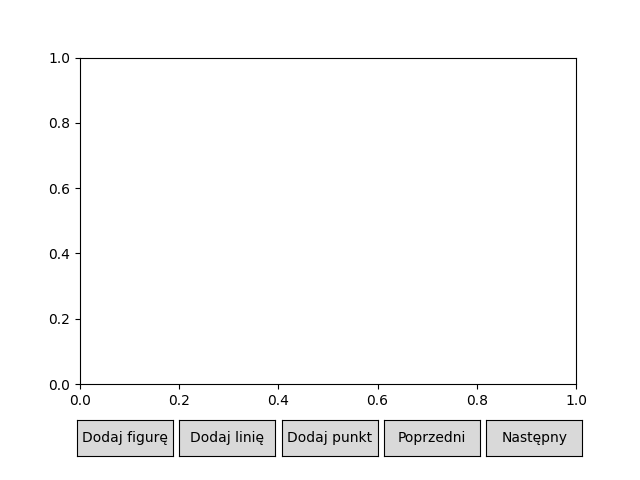

In [5]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
array([[ -8.53988212, -99.63468479],
       [ 10.54920378, -99.44201476],
       [ 11.96310356, -99.28184201],
       [ 12.84095886, -99.17212197],
       [ 18.34027886, -98.30378513],
       [ 24.12470507, -97.04637348],
       [ 24.42036919, -96.97239591],
       [ 25.40756766, -96.71843416],
       [ 34.65484723, -93.80320657],
       [ 35.55223616, -93.46677754],
       [ 37.65479272, -92.63971387],
       [ 37.69810426, -92.62209744],
       [ 37.80164269, -92.5798888 ],
       [ 38.96993818, -92.09421219],
       [ 53.54191658, -84.45864769],
       [ 63.42964884, -77.30898814],
       [ 67.69772182, -73.60039714],
       [ 74.21741304, -67.02071025],
       [ 74.99602496, -66.14828978],
       [ 75.70695619, -65.33342777],
       [ 84.82506189, -52.95950222],
       [ 85.54041715, -51.79611021],
       [ 85.58136364, -51.72842737],
       [ 86.06862657, -50.91356912],
       [ 87.53849698, -48.34264729],
       [ 90.17788648, -43.21977

<IPython.core.display.Javascript object>


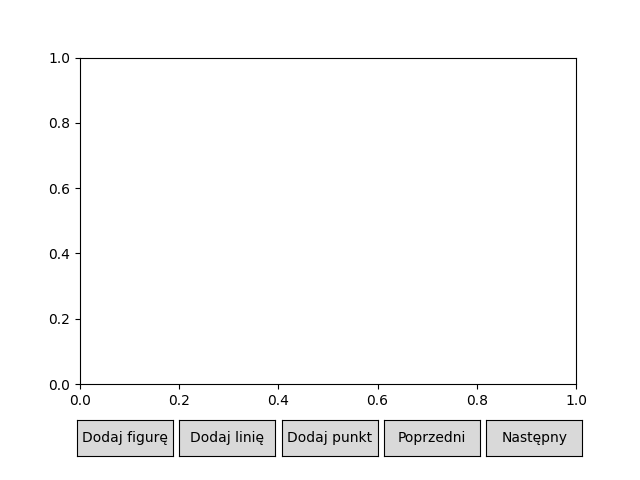

In [6]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
array([[ -84.52875835, -100.        ],
       [  98.32306882, -100.        ],
       [ 100.        ,  -96.23709956],
       [ 100.        ,   99.80083943],
       [  64.84001876,  100.        ],
       [ -85.73662217,  100.        ],
       [-100.        ,   98.96266854],
       [-100.        ,  -94.15840786]])


<IPython.core.display.Javascript object>


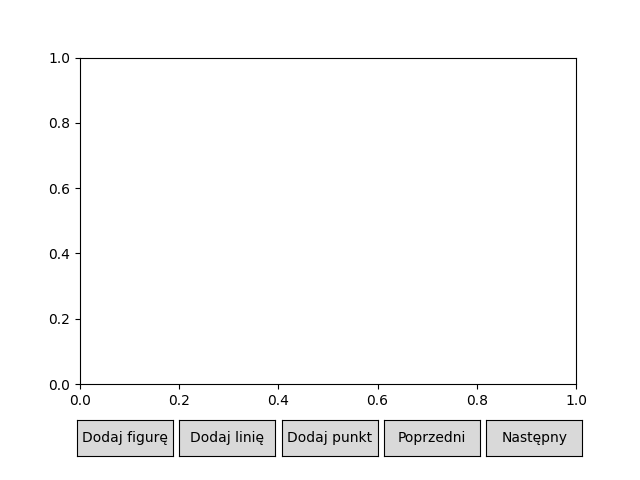

In [7]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

Liczba punktow otoczki: 4
Punkty otoczki:
array([[ 0.,  0.],
       [10.,  0.],
       [10., 10.],
       [ 0., 10.]])


<IPython.core.display.Javascript object>


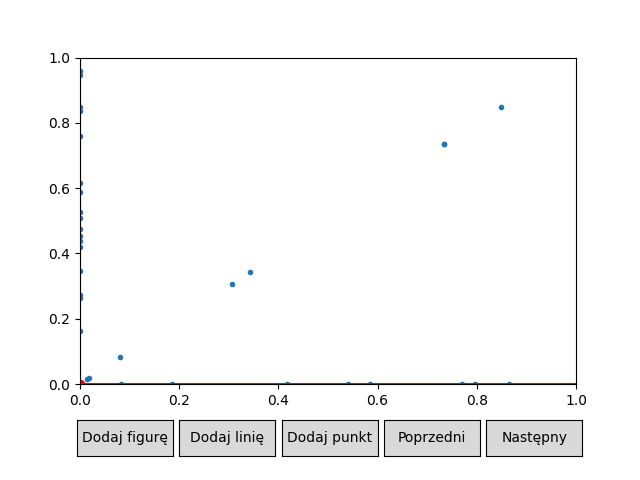

In [8]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod  

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 12
Punkty otoczki:
[(-95, -98),
 (64, -83),
 (73, -79),
 (96, -7),
 (98, 29),
 (100, 76),
 (80, 84),
 (18, 91),
 (-55, 93),
 (-74, 92),
 (-99, 79),
 (-100, -60)]


<IPython.core.display.Javascript object>


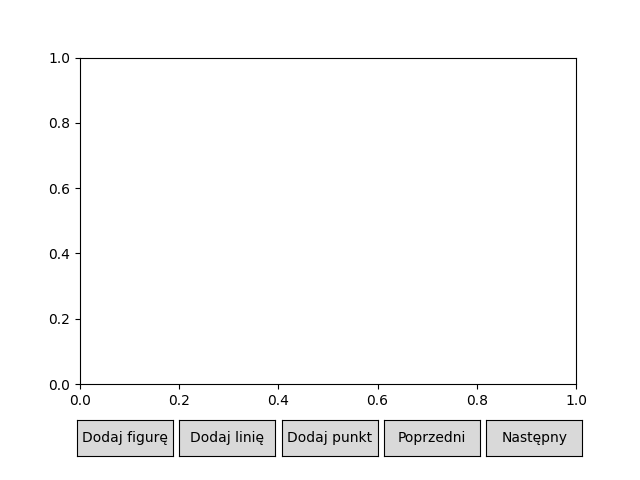

In [9]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-8.53988211585657, -99.63468479122757),
 (10.54920377803206, -99.44201476061089),
 (11.963103562161464, -99.28184201132149),
 (12.840958858150762, -99.1721219678357),
 (18.340278858025318, -98.30378513266857),
 (24.1247050659726, -97.04637347927967),
 (24.420369194634127, -96.97239590933991),
 (25.407567659458923, -96.7184341562146),
 (34.65484723326757, -93.8032065722643),
 (35.5522361591567, -93.46677754198842),
 (37.65479271744173, -92.63971386725295),
 (37.69810426303318, -92.62209744425722),
 (37.801642687826664, -92.5798887993601),
 (38.96993818157416, -92.09421218580617),
 (53.541916576983574, -84.45864768786753),
 (63.42964884098619, -77.30898814438835),
 (67.69772182430108, -73.60039714430587),
 (74.21741303551414, -67.02071024926471),
 (74.99602495980055, -66.14828977554123),
 (75.70695619035149, -65.33342777164076),
 (84.82506188792921, -52.95950222300979),
 (85.54041715338035, -51.79611021327446),
 (85.58136363599765, -51.728427

<IPython.core.display.Javascript object>


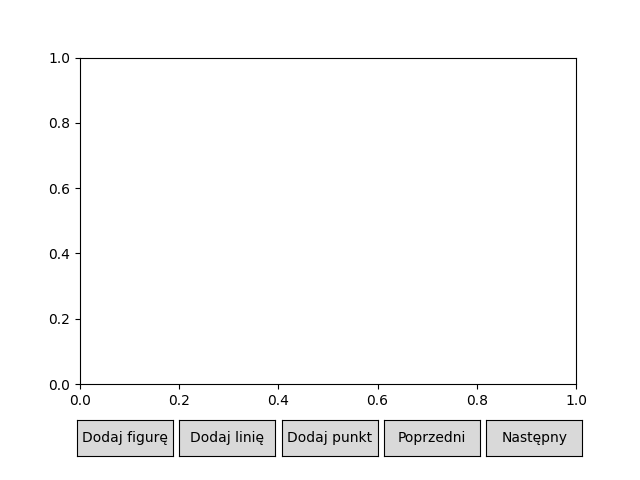

In [10]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-84.52875834507782, -100.0),
 (98.32306881941815, -100.0),
 (100.0, -96.23709956305558),
 (100.0, 99.80083942787365),
 (64.8400187588228, 100.0),
 (-85.73662216733487, 100.0),
 (-100.0, 98.9626685358279),
 (-100.0, -94.1584078577821)]


<IPython.core.display.Javascript object>


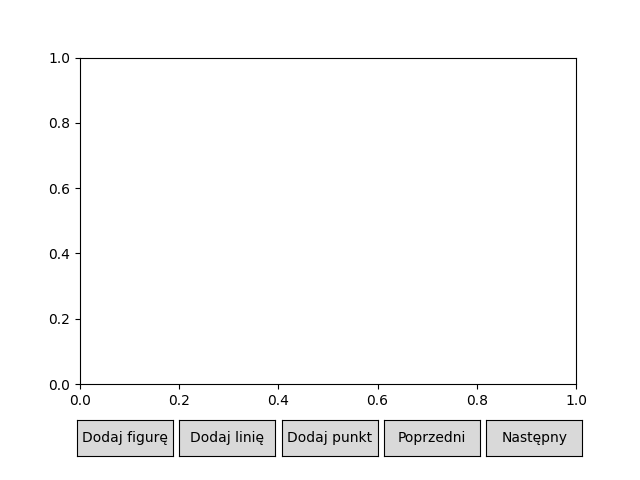

In [11]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (10, 0), (10, 10), (0, 10)]


<IPython.core.display.Javascript object>


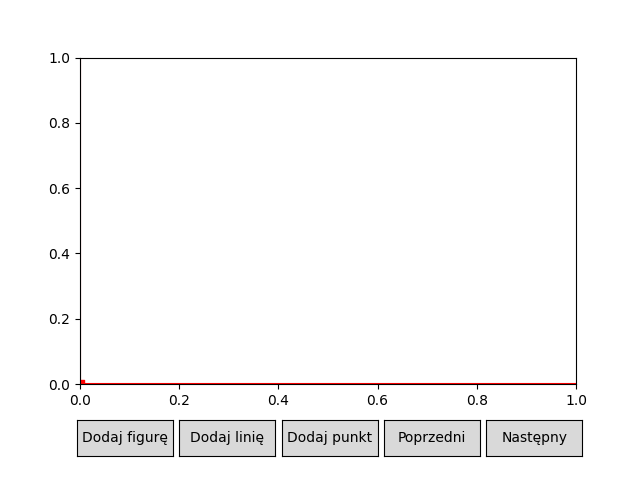

In [12]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 12
Punkty otoczki:
[(-100, -60),
 (-99, 79),
 (-74, 92),
 (-55, 93),
 (18, 91),
 (80, 84),
 (100, 76),
 (98, 29),
 (96, -7),
 (73, -79),
 (64, -83),
 (-95, -98)]


<IPython.core.display.Javascript object>


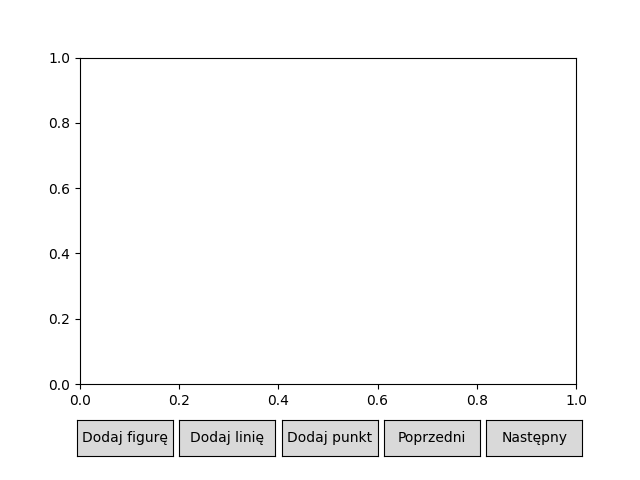

In [13]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-99.98483748091995, -1.7413425607915243),
 (-98.76651981727177, 15.658051065968042),
 (-98.48958460546723, 17.31478340154771),
 (-97.06212673400802, 24.06124589191851),
 (-95.79352180583697, 28.698452572127202),
 (-94.53808347200226, 32.596790845737154),
 (-91.74594825780476, 39.782923199234766),
 (-88.20497572481307, 47.11562646707711),
 (-86.37225585482027, 50.396760000514575),
 (-84.52759333657386, 53.433004451619546),
 (-82.14386981921295, 57.02968219378568),
 (-81.4719255468515, 57.98556154499399),
 (-77.4722118548254, 63.23018575270083),
 (-74.97584251927027, 66.17116470582623),
 (-74.65453705976955, 66.53345095808194),
 (-74.41094212572473, 66.80577588773328),
 (-71.82421176765777, 69.57932598088782),
 (-66.35567381305394, 74.81259621758618),
 (-55.43738730477744, 83.22677507160843),
 (-50.447153628548236, 86.34283230690116),
 (-48.65634800825768, 87.36452253918246),
 (-39.31985529338232, 91.94535866321625),
 (-33.41092747808414, 94.

<IPython.core.display.Javascript object>


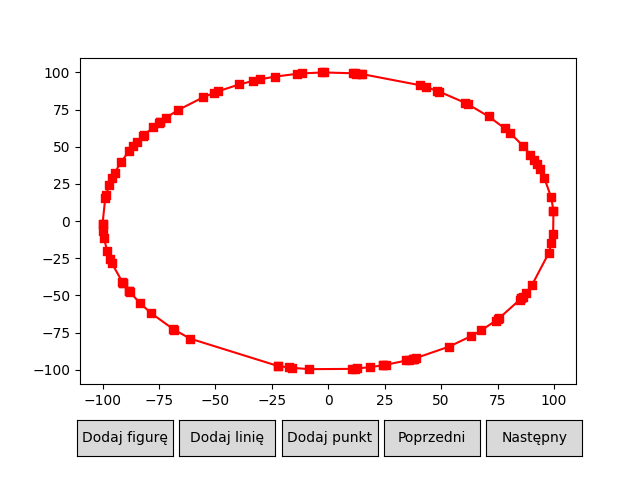

In [14]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-100.0, -94.1584078577821),
 (-100.0, 98.9626685358279),
 (-85.73662216733487, 100.0),
 (64.8400187588228, 100.0),
 (100.0, 99.80083942787365),
 (100.0, -96.23709956305558),
 (98.32306881941815, -100.0),
 (-84.52875834507782, -100.0)]


<IPython.core.display.Javascript object>


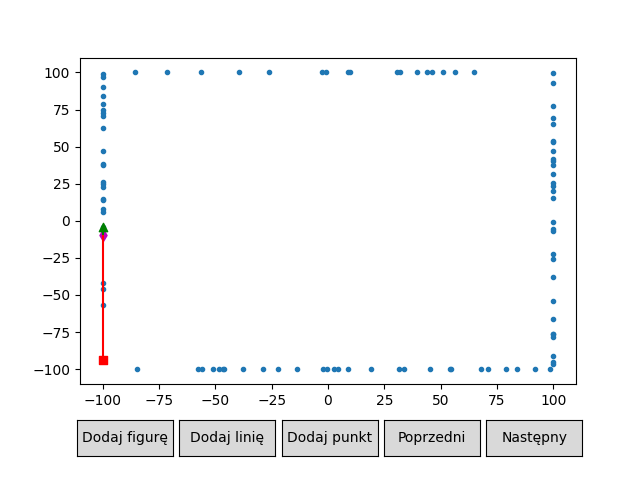

In [15]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


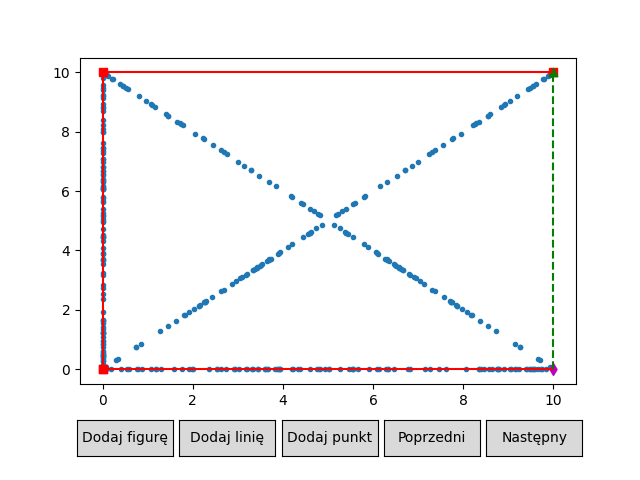

In [17]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 12
Punkty otoczki:
[(-100, -60),
 (-95, -98),
 (64, -83),
 (73, -79),
 (96, -7),
 (98, 29),
 (100, 76),
 (80, 84),
 (18, 91),
 (-55, 93),
 (-74, 92),
 (-99, 79)]


<IPython.core.display.Javascript object>


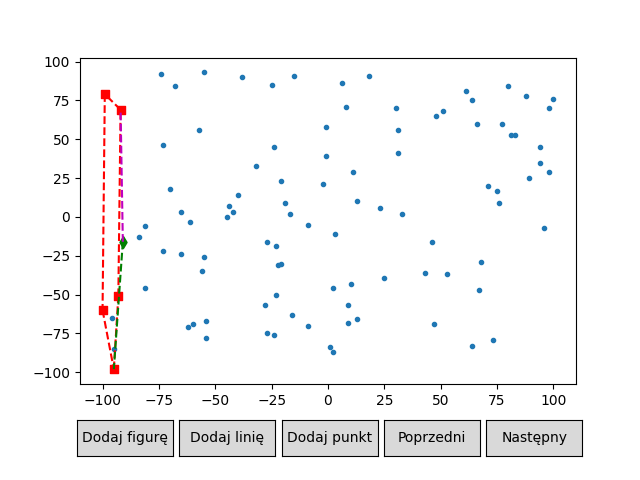

In [18]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-99.98483748091995, -1.7413425607915243),
 (-98.76651981727177, 15.658051065968042),
 (-98.48958460546723, 17.31478340154771),
 (-97.06212673400802, 24.06124589191851),
 (-95.79352180583697, 28.698452572127202),
 (-94.53808347200226, 32.596790845737154),
 (-91.74594825780476, 39.782923199234766),
 (-88.20497572481307, 47.11562646707711),
 (-86.37225585482027, 50.396760000514575),
 (-84.52759333657386, 53.433004451619546),
 (-82.14386981921295, 57.02968219378568),
 (-81.4719255468515, 57.98556154499399),
 (-77.4722118548254, 63.23018575270083),
 (-74.97584251927027, 66.17116470582623),
 (-74.65453705976955, 66.53345095808194),
 (-74.41094212572473, 66.80577588773328),
 (-71.82421176765777, 69.57932598088782),
 (-66.35567381305394, 74.81259621758618),
 (-55.43738730477744, 83.22677507160843),
 (-50.447153628548236, 86.34283230690116),
 (-48.65634800825768, 87.36452253918246),
 (-39.31985529338232, 91.94535866321625),
 (-33.41092747808414, 94.

<IPython.core.display.Javascript object>


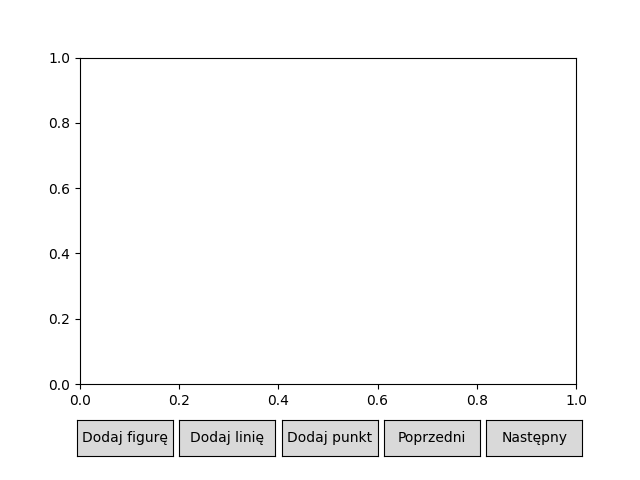

In [19]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-100.0, -94.1584078577821),
 (-100.0, 98.9626685358279),
 (-85.73662216733487, 100.0),
 (64.8400187588228, 100.0),
 (100.0, 99.80083942787365),
 (100.0, -96.23709956305558),
 (98.32306881941815, -100.0),
 (-84.52875834507782, -100.0)]


<IPython.core.display.Javascript object>


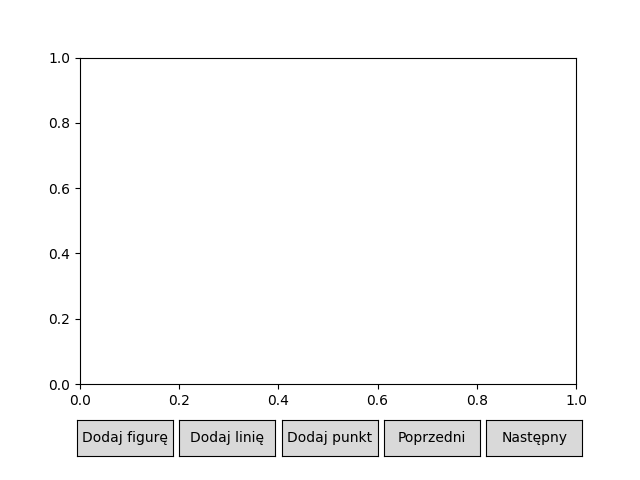

In [21]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


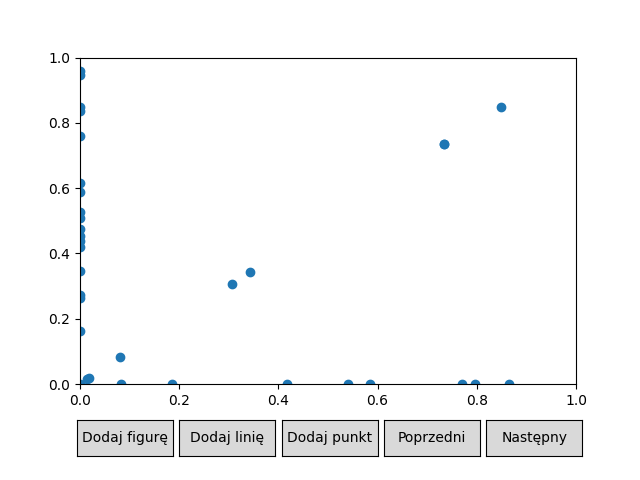

In [23]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 12
Punkty otoczki:
[(-55, 93),
 (-74, 92),
 (-99, 79),
 (-100, -60),
 (-95, -98),
 (64, -83),
 (73, -79),
 (96, -7),
 (98, 29),
 (100, 76),
 (80, 84),
 (18, 91)]


<IPython.core.display.Javascript object>


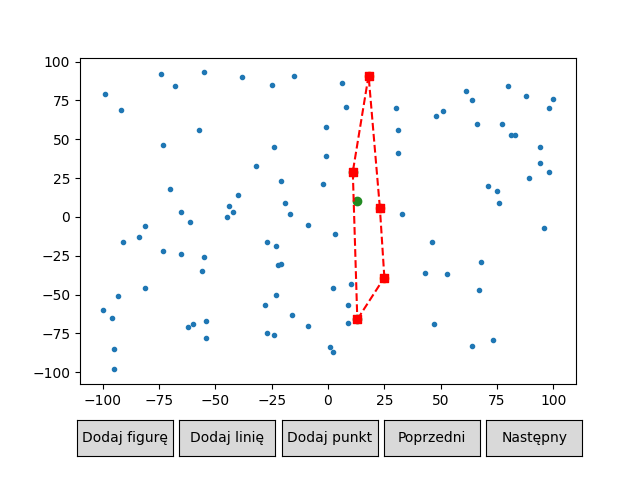

In [25]:
%matplotlib notebook

k = 5 

ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-2.007008525452858, 99.97985755530341),
 (-2.593896394117114, 99.96635284682834),
 (-11.654611812427017, 99.31852809774033),
 (-13.864076677626336, 99.03427375346828),
 (-23.716008289321334, 97.147058374512),
 (-30.046812599763744, 95.37918563604262),
 (-33.41092747808414, 94.25343455309309),
 (-39.31985529338232, 91.94535866321625),
 (-48.65634800825768, 87.36452253918246),
 (-50.447153628548236, 86.34283230690116),
 (-55.43738730477744, 83.22677507160843),
 (-66.35567381305394, 74.81259621758618),
 (-71.82421176765777, 69.57932598088782),
 (-74.41094212572473, 66.80577588773328),
 (-74.65453705976955, 66.53345095808194),
 (-74.97584251927027, 66.17116470582623),
 (-77.4722118548254, 63.23018575270083),
 (-81.4719255468515, 57.98556154499399),
 (-82.14386981921295, 57.02968219378568),
 (-84.52759333657386, 53.433004451619546),
 (-86.37225585482027, 50.396760000514575),
 (-88.20497572481307, 47.11562646707711),
 (-91.74594825780476, 39.7829

<IPython.core.display.Javascript object>


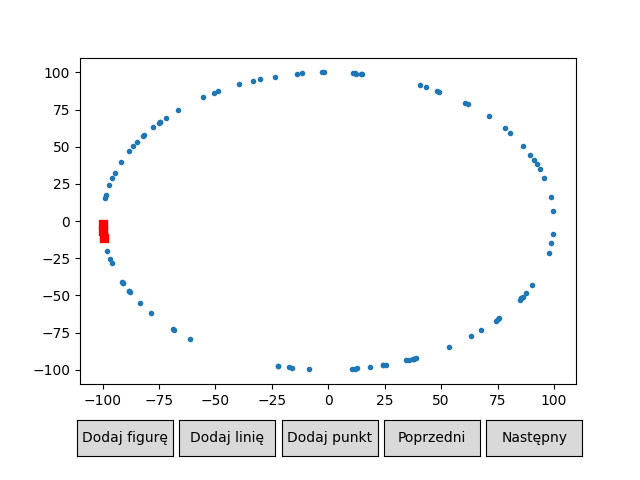

In [28]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 45
Punkty otoczki:
[(9.799321900470034, 100.0),
 (8.975795678700933, 100.0),
 (-1.0620415490373034, 100.0),
 (-2.487565732572534, 100.0),
 (-26.340499277818253, 100.0),
 (-39.534843518778644, 100.0),
 (-56.52272485274386, 100.0),
 (-71.49727791826979, 100.0),
 (-85.73662216733487, 100.0),
 (-100.0, 47.1793119924223),
 (-100.0, 13.723085554350405),
 (-84.52875834507782, -100.0),
 (-57.563868429721495, -100.0),
 (-56.06109293284875, -100.0),
 (-46.404365880392895, -100.0),
 (-46.26589897128382, -100.0),
 (-37.74788006227272, -100.0),
 (-28.705248086037642, -100.0),
 (-22.242189209777138, -100.0),
 (-13.711060480562764, -100.0),
 (-2.0496241916731606, -100.0),
 (-0.6611833700797689, -100.0),
 (2.800388250709588, -100.0),
 (4.576837044960058, -100.0),
 (8.73282305618632, -100.0),
 (19.276634478518417, -100.0),
 (31.2872659969197, -100.0),
 (33.614974619673006, -100.0),
 (45.2745199538148, -100.0),
 (54.223430021253364, -100.0),
 (54.77616300653932, -100.0),
 (83.735

<IPython.core.display.Javascript object>


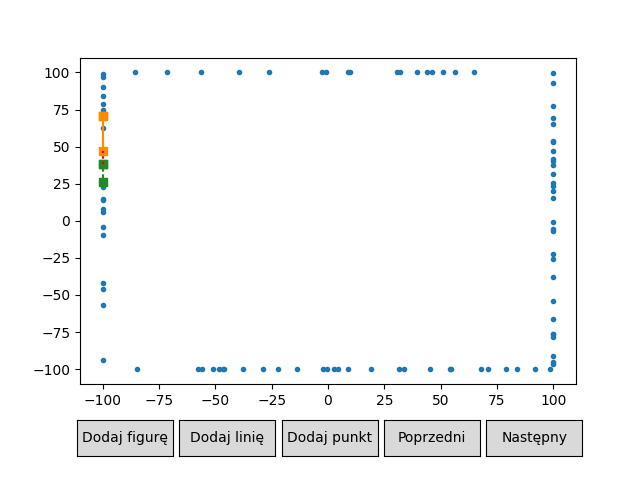

In [31]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 145
Punkty otoczki:
[(3.2988333056470154, 6.701166694352985),
 (3.2899195805462353, 6.710080419453765),
 (3.1478965222070032, 6.852103477792997),
 (3.0092117894497328, 6.990788210550267),
 (2.756596681529805, 7.243403318470195),
 (2.688551585608499, 7.311448414391501),
 (2.6178026742207745, 7.3821973257792255),
 (2.451970654836445, 7.548029345163555),
 (2.2775487448466825, 2.2775487448466825),
 (2.2775487448466825, 2.2775487448466825),
 (2.2467496408076393, 7.753250359192361),
 (2.2169201283408633, 7.783079871659137),
 (2.059038513414137, 7.940961486585863),
 (1.6566710352511897, 8.34332896474881),
 (1.4590809174825097, 8.54091908251749),
 (1.4548011460654884, 8.545198853934512),
 (1.412831945328044, 8.587168054671956),
 (1.1606283739845207, 8.83937162601548),
 (1.0888957188143031, 8.911104281185697),
 (1.064206938557767, 8.935793061442233),
 (0.9614166216093718, 9.038583378390628),
 (0.7987014792580318, 9.201298520741968),
 (0.5719115762497182, 9.42808842375028

<IPython.core.display.Javascript object>


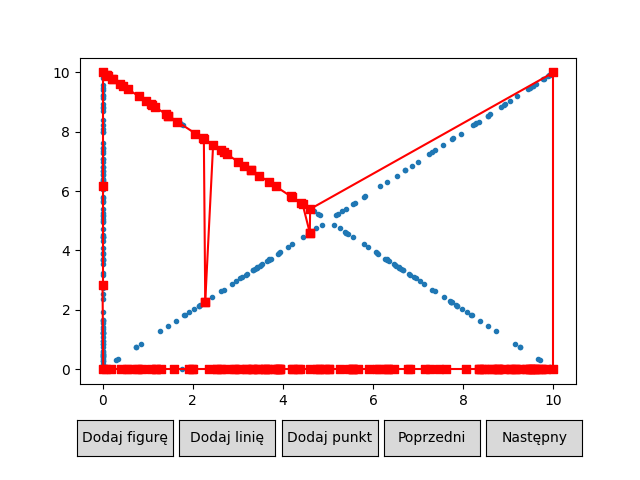

In [32]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [38]:
from copy import deepcopy

def nextvert(C,curr,plot=None,ans=None,points=None):#dla danego punktu wspolzednymi z Q[i][j] jesli jest to punkt nalezacy do finalnej otoczki, to
    #zwraca nastepny punkt nalezacy do finalnej otoczki zadanego w takich samych wspolzednych Q[nxt[0]][nxt[1]]
    i,j=curr
    nxt=(i,(j+1)%len(C[i]))
    for k in range(len(C)):
        t=tangent(C[i][j],C[k])
        if t== None : 
            continue
        
        if plot!=None:
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)), PointsCollection(deepcopy(ans),color='green'),
                                         PointsCollection(deepcopy(C[k]),color='red'),
                                         PointsCollection([C[k][t]],color='firebrick'),
                                        PointsCollection([C[nxt[0]][nxt[1]]],color='violet')],
                                lines=[LinesCollection(makeSheaf(ans),color='yellow'),
                                      LinesCollection([[ans[len(ans)-1],C[nxt[0]][nxt[1]]]],color='violet'),
                                      LinesCollection([[ans[len(ans)-1],C[k][t]]],color='firebrick'),
                                      LinesCollection(makeFullSheaf(C[k]),color='red')]))
        
        if k!=i and compr(C[nxt[0]][nxt[1]],C[k][t],C[i][j])>0 and (k,t)!=(curr):
            nxt=(k,t)
    
    return nxt

def chanUtil(points,m,plot=None):
    Q=divide(points,m)
    C=[]
    for i in range(len(Q)):
        C.append(graham(Q[i]))
        
    if plot!=None:
        pkt=[PointsCollection(deepcopy(Q[i]),color=randomColor()) for i in range(len(Q))]

        plot.add_scene(Scene(points=pkt))
        
        lns=[LinesCollection(makeFullSheaf(C[i]),color=randomColor()) for i in range(len(C))]
        pkt=[PointsCollection(deepcopy(C[i])) for i in range(len(Q))]
        
        plot.add_scene(Scene(points=pkt,lines=lns))
    
    curr=(0,0)
    ans=[]
    i=0
    while i<m:
        ans.append(C[curr[0]][curr[1]])
        if plot!= None :
            plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(ans),color='green')],
                           lines=[LinesCollection(makeSheaf(ans),color='yellow')]))
                               
        nxt=nextvert(C,curr,plot,ans,points)
        if nxt == (0,0):
            return ans
        curr=nxt
        i+=1
        
    
    return None      

def chan(points,visual=False):
    plot=None
    if visual:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(points))])])
    n=len(points)
    m=4
    hoax=None
    while hoax==None:
        hoax=chanUtil(points,m,plot)
        m=min(n,m*m)
    
    if visual == True:
        plot.add_scene(Scene(points=[PointsCollection(a),PointsCollection(hoax,color='green')],
                        lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return hoax

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


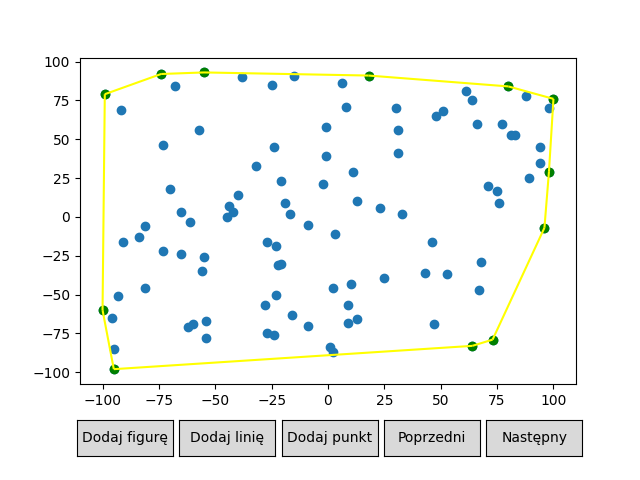

In [39]:
%matplotlib notebook
plot=chan(a,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


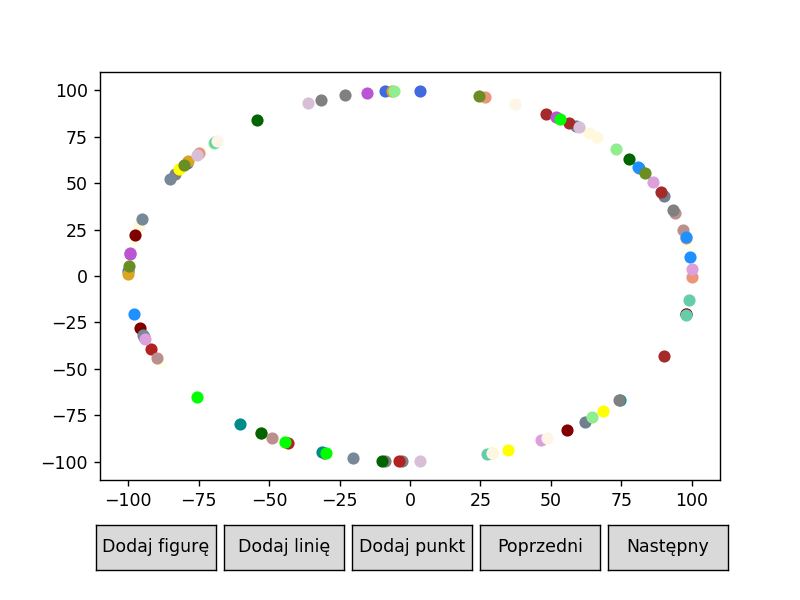

In [27]:
%matplotlib notebook
plot=chan(b,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan(c,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=chan(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [40]:
def furthest(a, b, considering):
    n = len(considering)
    i = 0
    ans = None
    while i < n:
        if det(a, b, considering[i]) < 0:  # rozwazany wierzcholek jest po prawej stronie ab
            if ans == None or det(a, b, considering[i]) < det(a, b,
                                                              ans):  # |det(a,b,c)| = 1/2|ab|*h, gdzie h jest wysokoscia z c na ab
                ans = considering[i]
        i += 1
    return ans


def insideTriangle(a, b, c, i):
    if det(a, b, i) >= 0 and det(b, c, i) >= 0 and det(c, a, i) >= 0:
        return True
    return False


def removeInner(a, b, c, considering):
    new=[]
    for i in considering:
        if not insideTriangle(a, b, c, i):
            new.append(i)
    considering.clear()
    considering+=new

def quickHullUtil(a, b, considering,plot=None,hull=None):     
    if len(considering) == 0:
        return []
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
        
    c = furthest(a, b, considering)
    if c == None:
        return []
    considering.remove(c)
    
    if plot!=None :
        hull.append(c)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green'),
                                    PointsCollection([c],color='red')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,c],[b,c]],color='yellow')]))

    removeInner(a, c, b, considering)
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,b],[a,c],[b,c]],color='yellow')]))
    
        z=quickHullUtil(a, c, considering,plot,hull)
        
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[b,c]],color='yellow')]))
        
        return z +[c]+ quickHullUtil(c, b, considering,plot,hull)
    
    return quickHullUtil(a, c, considering) +[c]+ quickHullUtil(c, b, considering)


def quickHull(points,visual=False):
    a = min(points, key=lambda x: x[0])
    b = max(points, key=lambda x: x[0])

    considering = deepcopy(points)
    
    if visual==True:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(considering))])])
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection([a,b],color='red')]))

    considering.remove(a)
    considering.remove(b)
    
    
    if visual:
        hull=[a,b]
        hoax =[a]+quickHullUtil(a, b, considering,plot,hull) +[b] + quickHullUtil(b, a, considering,plot,hull)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(hoax),color='green')],
                           lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return [a]+quickHullUtil(a, b, considering)+[b]+  quickHullUtil(b, a, considering)

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


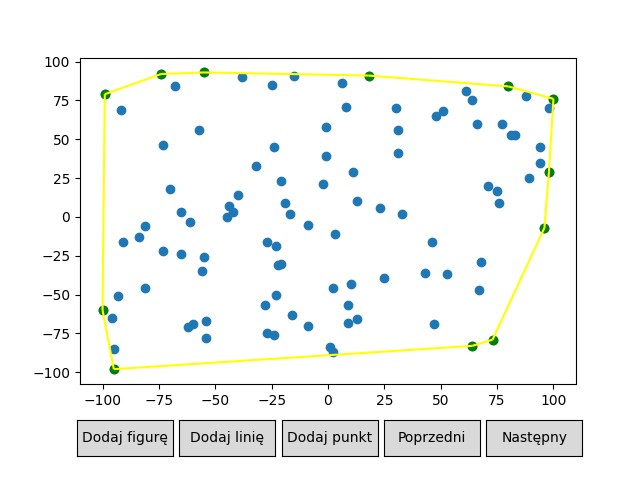

In [41]:
%matplotlib notebook
plot=quickHull(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


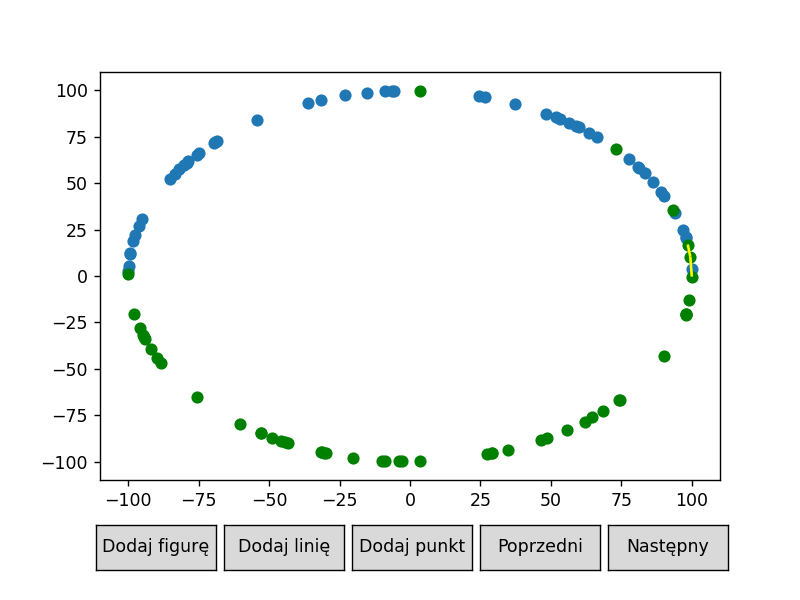

In [37]:
%matplotlib notebook
plot=quickHull(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=quickHull(c,visual=True).
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook
plot=quickHull(d,visual=True).
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>


### Funkcja do pomiaru czasów

<a id='section_id'></a>

In [45]:
import time

def timemesure(setFunction,hoaxFunctions,n1=1000,n2=20000,gaps=100):#zwraca wyniki pomiarów dla danych funkcji
    #w takiej kolejności, w jakeij sa podane w hoax Functions
    
    time_results=[]
    for j in range(n1,n2,gaps):
        time_result=[]
        a=setFunction(n=i)
        for i in range(len(hoaxFunction)):
            start=time.time()
            hoaxFunction(a)
            stop=time.time()
            time_result.append((i,stop-start))
        time_results.append(time_result)
        
    return time_results

<a id='section_id'></a>

<a id='section_id'></a>

## Zredefiniowane kody funkcji funkcji wyznaczających otoczkę bez wizualizacji - wizualizacja mogła by wpływać na korzyść niektórych i niekorzyść innych. Przed uruchomieniem pomiarów czasu uruchomić komórki z nowymi definicjami.

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Jarvis

<a id='section_id'></a>

<a id='section_id'></a>

### Graham

<a id='section_id'></a>

<a id='section_id'></a>

### Dolna górna

<a id='section_id'></a>

### Przyrostowy

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciężaj

<a id='section_id'></a>

<a id='section_id'></a>

### Chan

<a id='section_id'></a>

<a id='section_id'></a>

### Quick Hull

<a id='section_id'></a>

<a id='section_id'></a>

## Pomiary

<a id='section_id'></a>

<a id='section_id'></a>

### Chmura punktów

<a id='section_id'></a>

<a id='section_id'></a>

### Rozkład kołowy

<a id='section_id'></a>

<a id='section_id'></a>

### Losowy rozkład na prostokącie

<a id='section_id'></a>

<a id='section_id'></a>

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku

<a id='section_id'></a>

<a id='section_id'></a>